In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Nightclub.csv to Nightclub.csv


In [ ]:
initial_df = pd.read_csv("Nightclub.csv")

In [ ]:
initial_df.head()

,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,Once a Week,Male,21.0,caucasian,$50.000 - $79.999,Student,Some college
1,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,35.0,other,under $20.000,Retired,Some college
2,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,26.0,pacific islander,under $20.000,Retired,Some college
3,Frequent customer,Flat pricing,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2-3 Times a Month,Male,27.0,hispanic,$50.000 - $79.999,Full time employed,Bachelor’s degree
4,First time customer,Flat pricing,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,Less than Once a Month,Male,54.0,caucasian,under $20.000,Student,Some college


In [ ]:
initial_df.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Age
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,249.000000
mean,4.752000,4.764000,4.832000,4.540000,4.656000,4.588000,4.784000,4.412000,4.736000,4.280000,3.852000,32.654618
std,1.662997,1.631857,1.574067,1.478222,1.462264,1.534822,1.598614,1.508429,1.571043,1.745217,1.564573,12.361213
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,22.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,4.000000,28.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,42.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,70.000000


#Data Cleaning

In [ ]:
# checking the number of missing values for each column
np.sum(initial_df.isnull(), axis =0)

,0
CustomerType,0
Pricing_Strategy,0
Fair1,0
Fair2,0
Fair3,0
WOM_1,0
WOM_2,0
WOM_3,0
RI_1,0
RI_2,0


In [ ]:
initial_df["Age"] = initial_df["Age"].fillna(initial_df["Age"].mean()) # replace the missing age with the mean

In [ ]:
np.sum(initial_df.isnull(), axis =0) # check that there are no missing values

,0
CustomerType,0
Pricing_Strategy,0
Fair1,0
Fair2,0
Fair3,0
WOM_1,0
WOM_2,0
WOM_3,0
RI_1,0
RI_2,0


In [ ]:
df = initial_df.copy()

In [ ]:
# normalizing the fairness rating and revisit intent variables

fairness_columns = ['Fair1', 'Fair2', 'Fair3']
revisit_intent_columns = ['RI_1', 'RI_2', 'RI_3']

# Normalizing Fairness Columns
for col in fairness_columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

# Normalizing Revisit Intent Columns
for col in revisit_intent_columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

df.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Age
count,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000
mean,1.705303e-16,-1.421085e-16,1.705303e-16,4.540000,4.656000,4.588000,2.273737e-16,1.705303e-16,5.684342e-17,4.280000,3.852000,32.654618
std,1.000000e+00,1.000000e+00,1.000000e+00,1.478222,1.462264,1.534822,1.000000e+00,1.000000e+00,1.000000e+00,1.745217,1.564573,12.336366
min,-2.256168e+00,-2.306575e+00,-2.434458e+00,1.000000,1.000000,1.000000,-2.367051e+00,-2.261956e+00,-2.378038e+00,1.000000,1.000000,21.000000
25%,-4.521957e-01,-4.681784e-01,-5.285671e-01,4.000000,4.000000,4.000000,-4.904249e-01,-2.731319e-01,-4.684785e-01,3.000000,3.000000,22.000000
50%,1.491284e-01,1.446206e-01,1.067299e-01,5.000000,5.000000,5.000000,1.351171e-01,5.833885e-02,1.680412e-01,5.000000,4.000000,28.000000
75%,7.504525e-01,7.574195e-01,7.420269e-01,6.000000,6.000000,6.000000,7.606590e-01,1.052751e+00,8.045609e-01,6.000000,5.000000,42.000000
max,1.351777e+00,1.370218e+00,1.377324e+00,7.000000,7.000000,7.000000,1.386201e+00,1.715693e+00,1.441081e+00,7.000000,7.000000,70.000000


In [ ]:
# list of columns that are categorical
categorical = ["CustomerType", "Pricing_Strategy", "Nightclub_Frequency", "Gender", "Ethnicity", "Income", "Employment_status", "Education"]

In [ ]:
# one-hot-encode the categorical columns and drop the original columns
encoded = pd.get_dummies(df[categorical], dtype = int)
df.drop(categorical, axis = 1, inplace = True)
df = df.join(encoded)

In [ ]:
df.head()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,...,Employment_status_Retired,Employment_status_Student,Employment_status_Unemployed,Education_Bachelor’s degree,Education_Doctoral degree,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school
0,-1.654844,-1.693776,-1.799161,1.0,1.0,1.0,-1.741509,-0.936073,-2.378038,2.0,...,0,1,0,0,0,0,0,1,0,0
1,-2.256168,-2.306575,-2.434458,1.0,1.0,1.0,-2.367051,-2.261956,-2.378038,4.0,...,1,0,0,0,0,0,0,1,0,0
2,-2.256168,-2.306575,-2.434458,1.0,1.0,1.0,-2.367051,-2.261956,-2.378038,4.0,...,1,0,0,0,0,0,0,1,0,0
3,-0.452196,-1.080977,-1.799161,3.0,3.0,1.0,0.135117,-0.936073,0.168041,3.0,...,0,0,0,1,0,0,0,0,0,0
4,0.149128,0.757420,0.106730,1.0,2.0,1.0,-1.741509,-0.936073,-0.468479,5.0,...,0,1,0,0,0,0,0,1,0,0


# K-Means Clustering

In [ ]:
# Normalize ALL columns for K-Means
df_normalized = df.copy()

for col in df_normalized.columns:
  df_normalized[col] = (df_normalized[col] - df_normalized[col].mean()) / df_normalized[col].std()

df_normalized

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,...,Employment_status_Retired,Employment_status_Student,Employment_status_Unemployed,Education_Bachelor’s degree,Education_Doctoral degree,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school
0,-1.654844,-1.693776,-1.799161,-2.394769,-2.500232,-2.337730,-1.741509,-0.936073,-2.378038,-1.306428,...,-0.260965,1.107797,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
1,-2.256168,-2.306575,-2.434458,-2.394769,-2.500232,-2.337730,-2.367051,-2.261956,-2.378038,-0.160438,...,3.816608,-0.899082,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
2,-2.256168,-2.306575,-2.434458,-2.394769,-2.500232,-2.337730,-2.367051,-2.261956,-2.378038,-0.160438,...,3.816608,-0.899082,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
3,-0.452196,-1.080977,-1.799161,-1.041792,-1.132490,-2.337730,0.135117,-0.936073,0.168041,-0.733433,...,-0.260965,-0.899082,-0.19286,2.253258,-0.12726,-0.375481,-0.19286,-1.307869,-0.109987,-0.12726
4,0.149128,0.757420,0.106730,-2.394769,-1.816361,-2.337730,-1.741509,-0.936073,-0.468479,0.412556,...,-0.260965,1.107797,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.351777,0.757420,0.742027,0.987673,1.602993,1.571518,0.760659,1.052751,0.804561,0.985551,...,-0.260965,-0.899082,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
246,1.351777,1.370218,1.377324,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,...,-0.260965,1.107797,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726
247,0.149128,0.144621,0.106730,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,...,-0.260965,-0.899082,-0.19286,-0.442027,-0.12726,2.652595,-0.19286,-1.307869,-0.109987,-0.12726
248,0.750452,0.757420,0.742027,1.664161,1.602993,1.571518,1.386201,1.715693,1.441081,1.558545,...,-0.260965,1.107797,-0.19286,-0.442027,-0.12726,-0.375481,-0.19286,0.761544,-0.109987,-0.12726


[0.11333191784506201, 0.08592583602016166, 0.031789478056805064, 0.03906757525992591, 0.0483695456851281, 0.05130839638683409, 0.05776566378179626, 0.06107120096858066, 0.07023314338724464, 0.05653923608932784, 0.051305546484577025, 0.05945661910965682, 0.06109954438880364, 0.06091694016845393, 0.068885678323225, 0.07091876034097207, 0.07766588840143472, 0.08205655007666582, 0.08043924213974125]


Text(0, 0.5, 'Silhouette Score')

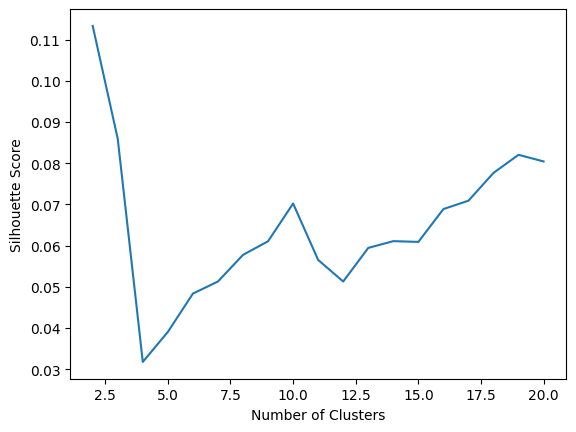

In [ ]:
# try cluster size from 2 to 20
# record the sihoulette scores and plot them to pick the best number of clusters
cluster_size = [i for i in range(2,21)]
silhouette_scores = []

for size in cluster_size:
  k_means = KMeans(n_clusters = size, random_state = 1)
  preds = k_means.fit_predict(df_normalized)
  silhouette_scores.append(silhouette_score(df_normalized, preds))

print(silhouette_scores)

plt.plot(cluster_size, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [ ]:
# use cluster size of 2 as it has the highest silhouette score
k_means = KMeans(n_clusters = 2, random_state = 1)
preds = k_means.fit_predict(df_normalized)

# assign the predicted cluster labels to each observation
df_kmeans = df.copy()
df_kmeans['cluster'] = preds

In [ ]:
kmeans_cluster0 = df_kmeans[df_kmeans['cluster']==0]
kmeans_cluster1 = df_kmeans[df_kmeans['cluster']==1]

In [ ]:
kmeans_cluster0.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,...,Employment_status_Student,Employment_status_Unemployed,Education_Bachelor’s degree,Education_Doctoral degree,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school,cluster
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.0,69.0
mean,-1.036090,-0.974404,-1.080999,2.826087,3.014493,2.797101,-1.242888,-1.147446,-1.206472,3.420290,...,0.333333,0.014493,0.188406,0.028986,0.130435,0.043478,0.608696,0.0,0.0,0.0
std,0.927970,0.853508,0.857291,1.056583,1.169373,1.105863,0.762966,0.714487,0.776689,1.726998,...,0.474858,0.120386,0.393901,0.168995,0.339248,0.205425,0.491618,0.0,0.0,0.0
min,-2.256168,-2.306575,-2.434458,1.000000,1.000000,1.000000,-2.367051,-2.261956,-2.378038,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,-1.654844,-1.693776,-1.799161,2.000000,2.000000,2.000000,-1.741509,-1.599015,-1.741518,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,-1.053520,-1.080977,-1.163864,3.000000,3.000000,3.000000,-1.115967,-0.936073,-1.104998,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
75%,-0.452196,-0.468178,-0.528567,4.000000,4.000000,4.000000,-0.490425,-0.936073,-0.468479,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
max,0.750452,0.757420,0.742027,5.000000,6.000000,5.000000,0.135117,0.389810,0.168041,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [ ]:
kmeans_cluster1.describe()

,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,...,Employment_status_Student,Employment_status_Unemployed,Education_Bachelor’s degree,Education_Doctoral degree,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school,cluster
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0
mean,0.394974,0.371458,0.412094,5.193370,5.281768,5.270718,0.473808,0.437424,0.459926,4.607735,...,0.491713,0.044199,0.154696,0.011050,0.121547,0.033149,0.640884,0.016575,0.022099,1.0
std,0.699747,0.778090,0.697835,1.022611,1.007279,1.048106,0.587808,0.702402,0.620292,1.641729,...,0.501318,0.206107,0.362618,0.104825,0.327668,0.179523,0.481072,0.128025,0.147415,0.0
min,-2.256168,-1.693776,-1.799161,1.000000,2.000000,2.000000,-1.741509,-1.599015,-1.741518,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.149128,0.144621,0.106730,4.000000,5.000000,4.000000,0.135117,-0.273132,0.168041,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.750452,0.757420,0.742027,5.000000,5.000000,5.000000,0.760659,0.389810,0.804561,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,0.750452,0.757420,0.742027,6.000000,6.000000,6.000000,0.760659,1.052751,0.804561,6.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,1.351777,1.370218,1.377324,7.000000,7.000000,7.000000,1.386201,1.715693,1.441081,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


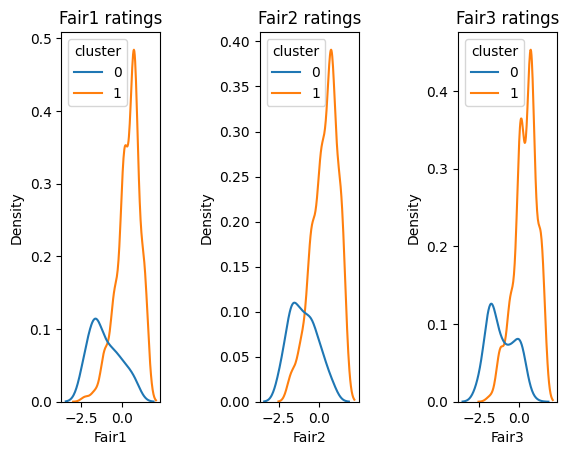

In [ ]:
# Look at fairness ratings
fig, ax = plt.subplots(1, 3)
sns.kdeplot(df_kmeans, x = "Fair1", ax = ax[0], hue ='cluster')
sns.kdeplot(df_kmeans, x = "Fair2", ax = ax[1], hue ='cluster')
sns.kdeplot(df_kmeans, x = "Fair3", ax = ax[2], hue ='cluster')
ax[0].set_title("Fair1 ratings")
ax[1].set_title("Fair2 ratings")
ax[2].set_title("Fair3 ratings")
plt.subplots_adjust(wspace = 1)

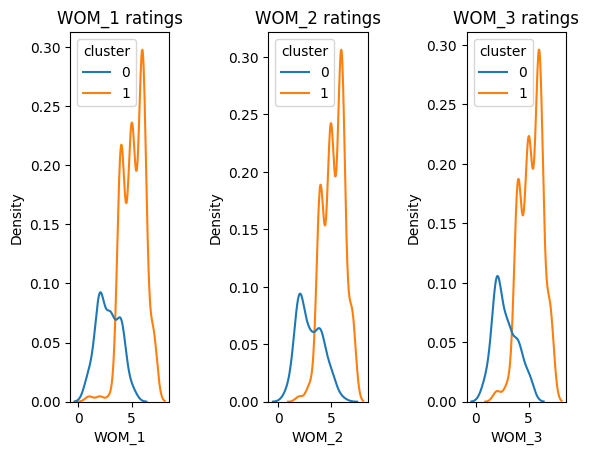

In [ ]:
# Look at word of mouth ratings
fig, ax = plt.subplots(1, 3)
sns.kdeplot(df_kmeans, x = 'WOM_1', ax = ax[0], hue ='cluster')
sns.kdeplot(df_kmeans, x = 'WOM_2', ax = ax[1], hue ='cluster')
sns.kdeplot(df_kmeans, x = 'WOM_3', ax = ax[2], hue ='cluster')
ax[0].set_title("WOM_1 ratings")
ax[1].set_title("WOM_2 ratings")
ax[2].set_title("WOM_3 ratings")
plt.subplots_adjust(wspace = 1)

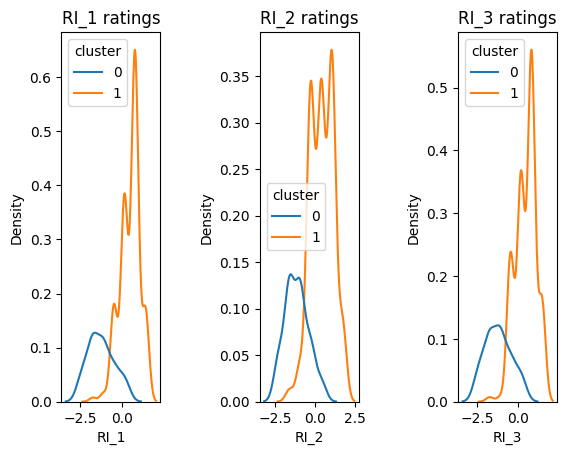

In [ ]:
# Look at revisit intent ratings
fig, ax = plt.subplots(1, 3)
sns.kdeplot(df_kmeans, x = 'RI_1', ax = ax[0], hue ='cluster')
sns.kdeplot(df_kmeans, x = 'RI_2', ax = ax[1], hue ='cluster')
sns.kdeplot(df_kmeans, x = 'RI_3', ax = ax[2], hue ='cluster')
ax[0].set_title("RI_1 ratings")
ax[1].set_title("RI_2 ratings")
ax[2].set_title("RI_3 ratings")
plt.subplots_adjust(wspace = 1)

Cluster 0 FAM1 stats: 
count    69.000000
mean      3.420290
std       1.726998
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       7.000000
Name: FAM1, dtype: float64
Cluster 1 FAM1 stats: 
count    181.000000
mean       4.607735
std        1.641729
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: FAM1, dtype: float64
Cluster 0 FAM2 stats: 
count    69.000000
mean      3.028986
std       1.413912
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: FAM2, dtype: float64
Cluster 1 FAM2 stats: 
count    181.000000
mean       4.165746
std        1.507440
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: FAM2, dtype: float64


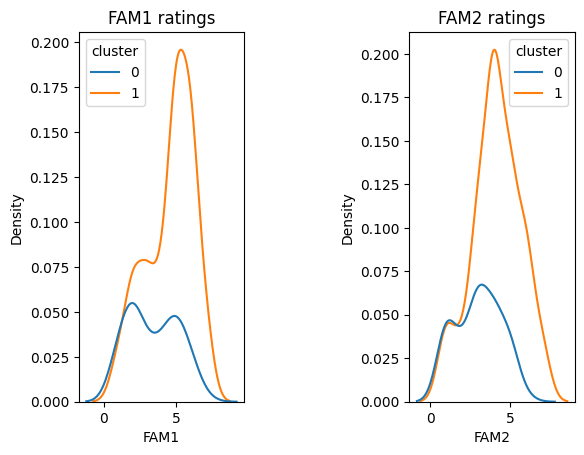

In [ ]:
# Look at familiarity ratings
print("Cluster 0 FAM1 stats: ")
print(kmeans_cluster0['FAM1'].describe())
print("Cluster 1 FAM1 stats: ")
print(kmeans_cluster1['FAM1'].describe())
print("Cluster 0 FAM2 stats: ")
print(kmeans_cluster0['FAM2'].describe())
print("Cluster 1 FAM2 stats: ")
print(kmeans_cluster1['FAM2'].describe())

fig, ax = plt.subplots(1, 2)
sns.kdeplot(df_kmeans, x = "FAM1", ax = ax[0], hue ='cluster')
sns.kdeplot(df_kmeans, x = "FAM2", ax = ax[1], hue ='cluster')
ax[0].set_title("FAM1 ratings")
ax[1].set_title("FAM2 ratings")
plt.subplots_adjust(wspace = 1)

Cluster 0 age stats: 
count    69.000000
mean     37.531226
std      14.429550
min      21.000000
25%      23.000000
50%      35.000000
75%      51.000000
max      70.000000
Name: Age, dtype: float64
Cluster 1 age stats: 
count    181.000000
mean      30.795580
std       10.921293
min       21.000000
25%       22.000000
50%       26.000000
75%       36.000000
max       67.000000
Name: Age, dtype: float64


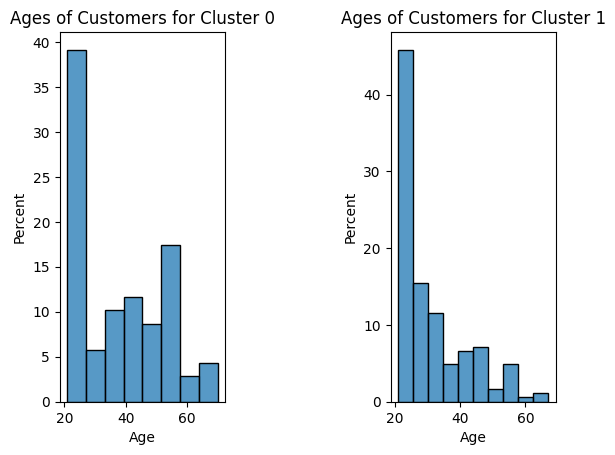

In [ ]:
# compare age
print("Cluster 0 age stats: ")
print(kmeans_cluster0['Age'].describe())
print("Cluster 1 age stats: ")
print(kmeans_cluster1['Age'].describe())

fig, ax = plt.subplots(1, 2)
sns.histplot(kmeans_cluster0, x = 'Age', stat = 'percent', ax = ax[0])
sns.histplot(kmeans_cluster1, x = 'Age', stat = 'percent', ax = ax[1])
ax[0].set_title("Ages of Customers for Cluster 0")
ax[1].set_title("Ages of Customers for Cluster 1")
plt.subplots_adjust(wspace = 1)


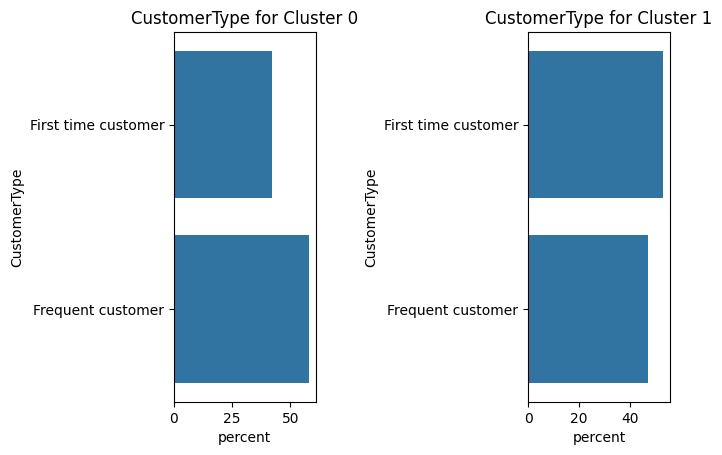

The proportions for CustomerType for cluster 0:
CustomerType
Frequent customer      0.57971
First time customer    0.42029
Name: count, dtype: float64
The proportions for CustomerType for cluster 1:
CustomerType
First time customer    0.530387
Frequent customer      0.469613
Name: count, dtype: float64


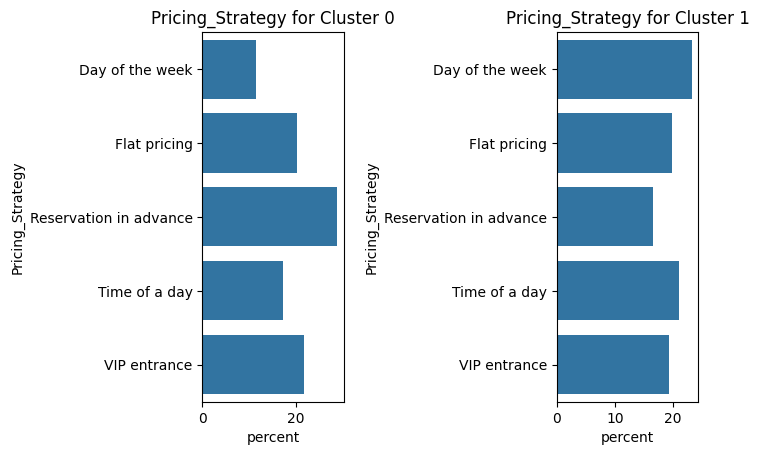

The proportions for Pricing_Strategy for cluster 0:
Pricing_Strategy
Reservation in advance    0.289855
VIP entrance              0.217391
Flat pricing              0.202899
Time of a day             0.173913
Day of the week           0.115942
Name: count, dtype: float64
The proportions for Pricing_Strategy for cluster 1:
Pricing_Strategy
Day of the week           0.232044
Time of a day             0.209945
Flat pricing              0.198895
VIP entrance              0.193370
Reservation in advance    0.165746
Name: count, dtype: float64


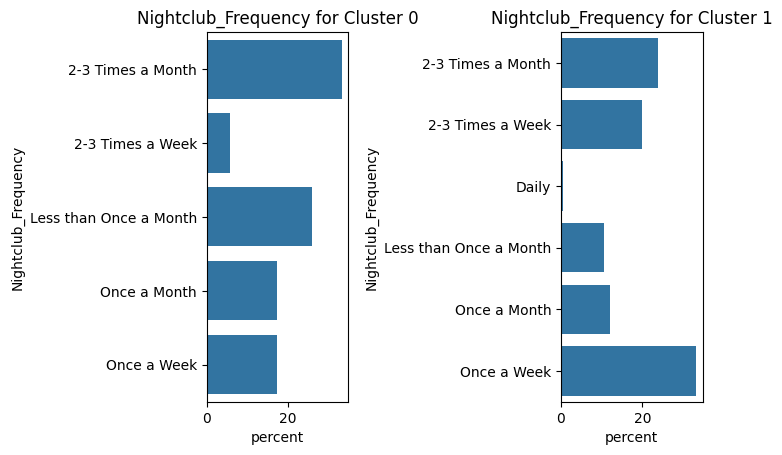

The proportions for Nightclub_Frequency for cluster 0:
Nightclub_Frequency
2-3 Times a Month         0.333333
Less than Once a Month    0.260870
Once a Week               0.173913
Once a Month              0.173913
2-3 Times a Week          0.057971
Name: count, dtype: float64
The proportions for Nightclub_Frequency for cluster 1:
Nightclub_Frequency
Once a Week               0.331492
2-3 Times a Month         0.237569
2-3 Times a Week          0.198895
Once a Month              0.121547
Less than Once a Month    0.104972
Daily                     0.005525
Name: count, dtype: float64


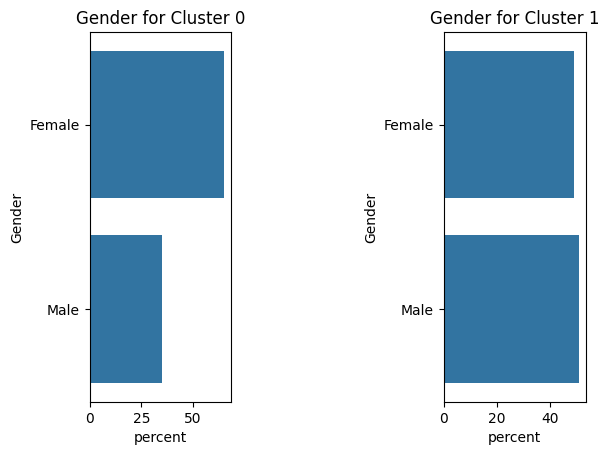

The proportions for Gender for cluster 0:
Gender
Female    0.652174
Male      0.347826
Name: count, dtype: float64
The proportions for Gender for cluster 1:
Gender
Male      0.508287
Female    0.491713
Name: count, dtype: float64


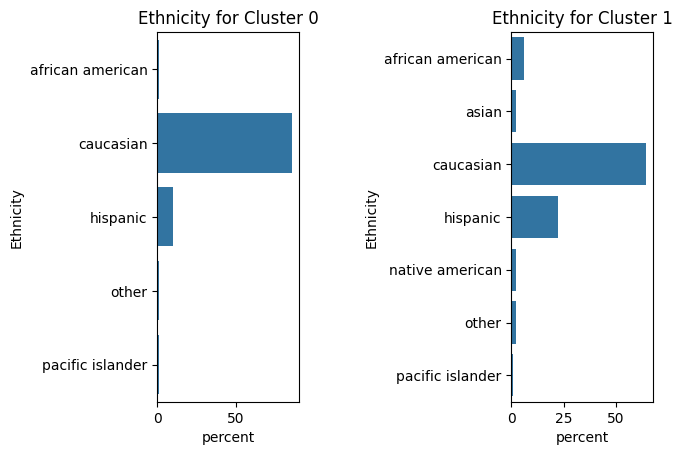

The proportions for Ethnicity for cluster 0:
Ethnicity
caucasian           0.855072
hispanic            0.101449
other               0.014493
pacific islander    0.014493
african american    0.014493
Name: count, dtype: float64
The proportions for Ethnicity for cluster 1:
Ethnicity
caucasian           0.646409
hispanic            0.220994
african american    0.060773
asian               0.022099
native american     0.022099
other               0.022099
pacific islander    0.005525
Name: count, dtype: float64


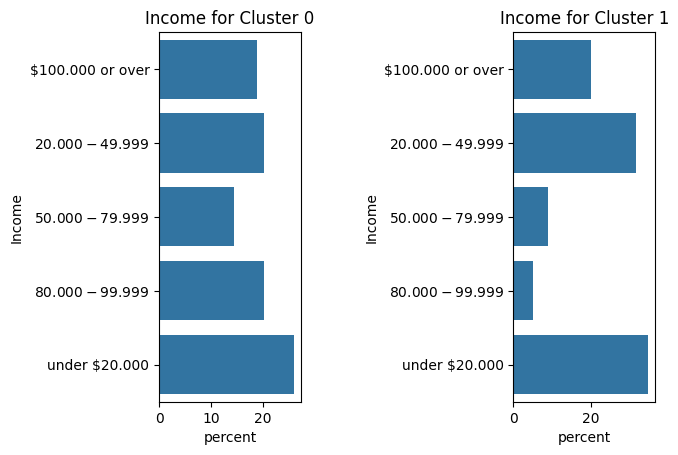

The proportions for Income for cluster 0:
Income
under $20.000        0.260870
$20.000 - $49.999    0.202899
$80.000 - $99.999    0.202899
$100.000 or over     0.188406
$50.000 - $79.999    0.144928
Name: count, dtype: float64
The proportions for Income for cluster 1:
Income
under $20.000        0.348066
$20.000 - $49.999    0.314917
$100.000 or over     0.198895
$50.000 - $79.999    0.088398
$80.000 - $99.999    0.049724
Name: count, dtype: float64


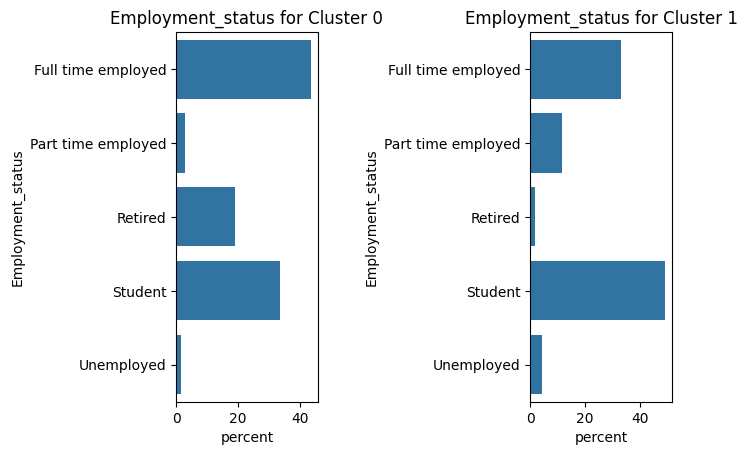

The proportions for Employment_status for cluster 0:
Employment_status
Full time employed    0.434783
Student               0.333333
Retired               0.188406
Part time employed    0.028986
Unemployed            0.014493
Name: count, dtype: float64
The proportions for Employment_status for cluster 1:
Employment_status
Student               0.491713
Full time employed    0.331492
Part time employed    0.116022
Unemployed            0.044199
Retired               0.016575
Name: count, dtype: float64


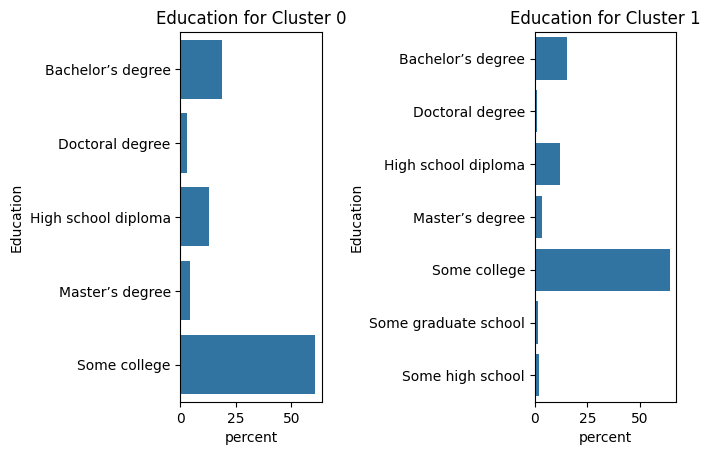

The proportions for Education for cluster 0:
Education
Some college           0.608696
Bachelor’s degree      0.188406
High school diploma    0.130435
Master’s degree        0.043478
Doctoral degree        0.028986
Name: count, dtype: float64
The proportions for Education for cluster 1:
Education
Some college            0.640884
Bachelor’s degree       0.154696
High school diploma     0.121547
Master’s degree         0.033149
Some high school        0.022099
Some graduate school    0.016575
Doctoral degree         0.011050
Name: count, dtype: float64


In [ ]:
# compare the other categorical values in the original categories
# easier to visualize/interpret
initial_df_kmeans = initial_df.copy()
initial_df_kmeans['cluster'] = preds

initial_df_kmeans_cluster_0 = initial_df_kmeans[initial_df_kmeans['cluster'] ==0]
initial_df_kmeans_cluster_1 = initial_df_kmeans[initial_df_kmeans['cluster'] ==1]

for col in categorical: # categorical is a list of the names of categorical variables
  # comparing the percentage of counts in each category FOR EACH categorical variable
  fig, ax = plt.subplots(1, 2)
  sns.countplot(initial_df_kmeans_cluster_0, y = col, stat = 'percent', ax = ax[0], order =sorted(initial_df_kmeans_cluster_0[col].unique()))
  sns.countplot(initial_df_kmeans_cluster_1, y = col,  stat = 'percent', ax = ax[1], order =sorted(initial_df_kmeans_cluster_1[col].unique()))
  plt.subplots_adjust(wspace = 1.5)
  ax[0].set_title(col + " for Cluster 0")
  ax[1].set_title(col + " for Cluster 1")
  plt.show()

  print("The proportions for " + col + " for cluster 0:")
  print(initial_df_kmeans_cluster_0[col].value_counts()/len(initial_df_kmeans_cluster_0[col]))

  print("The proportions for " + col + " for cluster 1:")
  print(initial_df_kmeans_cluster_1[col].value_counts()/len(initial_df_kmeans_cluster_1[col]))

# Data preprocessing for Hierarchical Clustering

I created another dataframe because I will change some columns before doing Hierarchical Clustering. I didn't want to edit the same dataframe because that could affect the previous clustering analysis due to local variables.

In [ ]:
df2 = df.copy()

# standardizing the word of mouth and familiarity variables to prepare them for PCA
# (fairness and revisit intent were already standardized in df)
word_of_mouth_columns = ['WOM_1', 'WOM_2', 'WOM_3']
familiarity_columns = ['FAM1', 'FAM2']

for col in word_of_mouth_columns:
    df2[col] = (df2[col] - df2[col].mean()) / df[col].std()

for col in familiarity_columns:
    df2[col] = (df2[col] - df2[col].mean()) / df[col].std()

# Intriguing Correlation Matrices

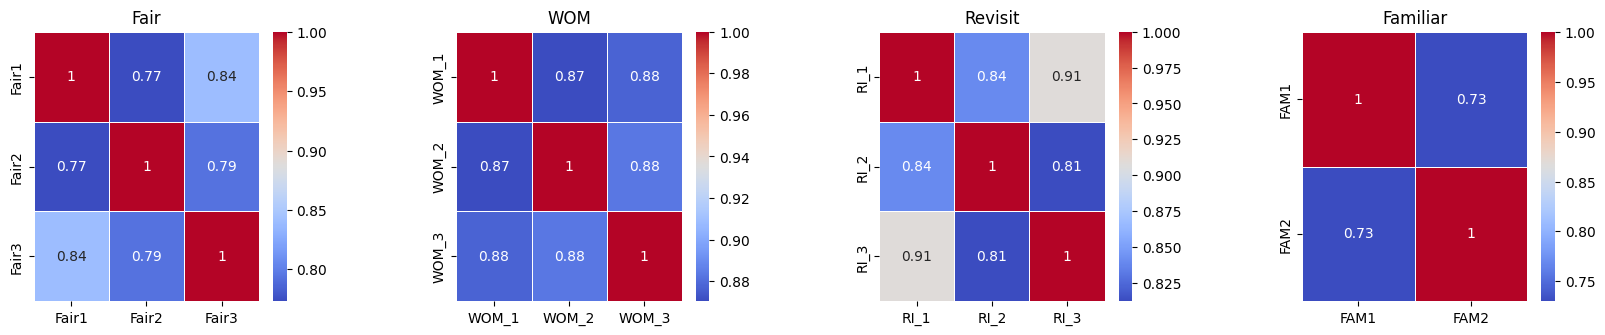

In [ ]:
fairness_vars = df2[['Fair1', 'Fair2', 'Fair3']]
wom_vars = df2[['WOM_1', 'WOM_2', 'WOM_3']]
ri_vars = df2[['RI_1', 'RI_2', 'RI_3']]
familiar_vars = df2[['FAM1', 'FAM2']]

correlation_matrix_fair = fairness_vars.corr()
correlation_matrix_wom = wom_vars.corr()
correlation_matrix_revisit = ri_vars.corr()
correlation_matrix_familiar = familiar_vars.corr()

# Create a figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(20, 3.5))  # 1 row, 4 columns

# Taking a look at the correlation matrix heatmap of fairness
sns.heatmap(correlation_matrix_fair, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[0])
ax[0].set_title('Fair')

# Taking a look at the correlation matrix heatmap of wom
sns.heatmap(correlation_matrix_wom, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[1])
ax[1].set_title('WOM')

# Taking a look at the correlation matrix heatmap of revisit intent
sns.heatmap(correlation_matrix_revisit, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[2])
ax[2].set_title('Revisit')

# Taking a look at the correlation matrix heatmap of familiarity
sns.heatmap(correlation_matrix_familiar, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[3])
ax[3].set_title('Familiar')

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)

# Show the figure
plt.show()

# Features within groups are highly correlated!

Within groups such as [Fair1, Fair2, Fair3] or [WOM_1, WOM_2, WOM_3] we can observe a high degree of correlation between the variables. In order to simplify our analysis, we can perform PCA on each group.

In [ ]:
from sklearn.decomposition import PCA

# 1. PCA on Fair1-Fair3
pca_fair = PCA(n_components=3)  # Keep all components first to see their explained variance
pca_fair.fit(fairness_vars)
# 2. Print explained variance ratio for each component
print("Explained variance ratios for Fair1-Fair3:", pca_fair.explained_variance_ratio_)


# 3. Repeat for WOM_1-WOM_3
pca_wom = PCA(n_components=3)
pca_wom.fit(wom_vars)
print("Explained variance ratios for WOM_1-WOM_3:", pca_wom.explained_variance_ratio_)

# 4. Repeat for RI_1-RI_3
pca_ri = PCA(n_components=3)
pca_ri.fit(ri_vars)
print("Explained variance ratios for RI_1-RI_3:", pca_ri.explained_variance_ratio_)


# 5. Repeat for FAM1-FAM2
pca_fam = PCA(n_components=2)
pca_fam.fit(familiar_vars)
print("Explained variance ratios for FAM1-FAM2:", pca_fam.explained_variance_ratio_)

Explained variance ratios for Fair1-Fair3: [0.86810692 0.07917443 0.05271865]
Explained variance ratios for WOM_1-WOM_3: [0.91797175 0.04349389 0.03853436]
Explained variance ratios for RI_1-RI_3: [0.90237931 0.06771054 0.02991014]
Explained variance ratios for FAM1-FAM2: [0.86502467 0.13497533]


It's apparent that the first Principal Components of each group explain a huge percentage of variance. This warrants keeping just the first Principal Component for each group.

In [ ]:
fair_pc = pca_fair.transform(fairness_vars)[:, 0]  # Select only the first principal component as it explains ~87% of the total variance
wom_pc = pca_wom.transform(wom_vars)[:, 0]         # -||- ~92% of the total variance
ri_pc = pca_ri.transform(ri_vars)[:, 0]            # -||- ~90% of the total variance
fam_pc = pca_fam.transform(familiar_vars)[:, 0]    # -||- ~87% of the total variance

# Create Series for the first principal components
fair_df = pd.Series(fair_pc, name='Fair_PC1')
wom_df = pd.Series(wom_pc, name='WOM_PC1')
ri_df = pd.Series(ri_pc, name='RI_PC1')
fam_df = pd.Series(fam_pc, name='FAM_PC1')

# Drop the original group columns
temp_df = df2.drop(columns=['Fair1', 'Fair2', 'Fair3', 'WOM_1', 'WOM_2', 'WOM_3', 'RI_1', 'RI_2', 'RI_3', 'FAM1', 'FAM2'])

# Concatenate the new principal component columns with the remaining data
df_pca = pd.concat([temp_df, fair_df, wom_df, ri_df, fam_df], axis=1)

#-----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------

# I realized later in the analysis that the PC columns' sign matters
# Even though it doesn't a Linear Algebra perspective,
# When I am analyzing fairness later on, I associate a positive/higher number there
# with a positive fairness rating. So, I will multiply all the PC columns
# by -1 to achieve this. But I believe this is machine/engine dependant,
# so I first check if there is even a need to do * -1.

expected_values = [2.972505, 4.175721, 2.930701, 1.760793]
pc_columns = ['Fair_PC1', 'WOM_PC1', 'RI_PC1', 'FAM_PC1']

# Check the first row values
first_row_values = df_pca.loc[0, pc_columns].values

# Compare and apply the inversion if the signs are flipped
if np.array_equal(first_row_values, expected_values):
  df_pca[pc_columns] = df_pca[pc_columns] * -1

# df_pca is the final DataFrame with the first principal component for each group
df_pca.head()

,Age,CustomerType_First time customer,CustomerType_Frequent customer,Pricing_Strategy_Day of the week,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance,Nightclub_Frequency_2-3 Times a Month,Nightclub_Frequency_2-3 Times a Week,...,Education_Doctoral degree,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school,Fair_PC1,WOM_PC1,RI_PC1,FAM_PC1
0,21.0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,-2.972505,-4.175721,-2.930701,-1.760793
1,35.0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,-4.040323,-4.175721,-4.046360,-0.498508
2,26.0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,-4.040323,-4.175721,-4.046360,-0.498508
3,27.0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,-1.927301,-2.606877,-0.351804,-0.903676
4,54.0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.579037,-3.780938,-1.822080,0.810558


In [ ]:
print(f'Dimensions of df2: {df2.shape[1]}')
print(f'Dimensions of df_pca: {df_pca.shape[1]}')

Dimensions of df2: 51
Dimensions of df_pca: 44


We managed to reduce the dimension of our dataset by 7! This should make clustering easier.

# Hierarchical Clustering

I've made the decision to cluster the data only based on the two most imporant features: Fairness and Revisit Intent. My idea was to (hopefully) get distinct clusters out of that. And then, to go back to the dataset, append the clusters labels, and look for patterns that make one cluster "more satisfied" with our nightclub service than the other.

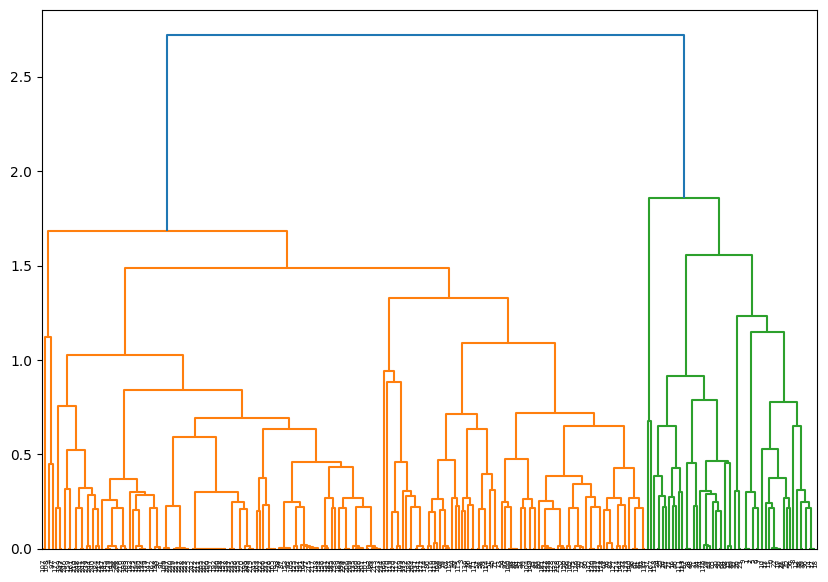

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_pca[['Fair_PC1', 'WOM_PC1', 'RI_PC1']] = scaler.fit_transform(df_pca[['Fair_PC1', 'WOM_PC1', 'RI_PC1']])

to_cluster = df_pca[['Fair_PC1', 'RI_PC1']]
H = linkage(to_cluster, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(H)
plt.show()

From the dendogram, it seems like picking 2 for the number of clusters is a good idea.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster_labels = cluster_model.fit_predict(to_cluster)
df_pca['cluster'] = cluster_labels

sil_score = silhouette_score(to_cluster, cluster_labels)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.5278880379676553


# Basic cluster statistics and visualization

In [ ]:
hierarchical_cluster0 = df_pca[df_pca['cluster']==0]
hierarchical_cluster1 = df_pca[df_pca['cluster']==1]

In [ ]:
hierarchical_cluster0.describe()

,Age,CustomerType_First time customer,CustomerType_Frequent customer,Pricing_Strategy_Day of the week,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance,Nightclub_Frequency_2-3 Times a Month,Nightclub_Frequency_2-3 Times a Week,...,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school,Fair_PC1,WOM_PC1,RI_PC1,FAM_PC1,cluster
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.0,55.0,55.000000,55.000000,55.000000,55.000000,55.0
mean,37.393720,0.381818,0.618182,0.127273,0.218182,0.272727,0.163636,0.218182,0.309091,0.090909,...,0.127273,0.036364,0.636364,0.0,0.0,-1.286172,-1.292213,-1.517243,-0.571036,0.0
std,14.314171,0.490310,0.490310,0.336350,0.416818,0.449467,0.373355,0.416818,0.466378,0.290129,...,0.336350,0.188919,0.485479,0.0,0.0,0.788571,0.761295,0.582664,1.224465,0.0
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,-2.508645,-2.521311,-2.464221,-2.617910,0.0
25%,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,-1.845635,-1.819975,-1.787732,-1.737403,0.0
50%,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.0,-1.196956,-1.581604,-1.562683,-0.498508,0.0
75%,51.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.0,-0.519614,-0.880268,-1.111242,0.358610,0.0
max,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.143396,0.985370,0.241737,1.667676,0.0


In [ ]:
hierarchical_cluster1.describe()

,Age,CustomerType_First time customer,CustomerType_Frequent customer,Pricing_Strategy_Day of the week,Pricing_Strategy_Flat pricing,Pricing_Strategy_Reservation in advance,Pricing_Strategy_Time of a day,Pricing_Strategy_VIP entrance,Nightclub_Frequency_2-3 Times a Month,Nightclub_Frequency_2-3 Times a Week,...,Education_High school diploma,Education_Master’s degree,Education_Some college,Education_Some graduate school,Education_Some high school,Fair_PC1,WOM_PC1,RI_PC1,FAM_PC1,cluster
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0
mean,31.317949,0.533333,0.466667,0.220513,0.194872,0.179487,0.210256,0.194872,0.251282,0.179487,...,0.123077,0.035897,0.630769,0.015385,0.020513,0.362766,0.364470,0.427940,0.161061,1.0
std,11.407695,0.500172,0.500172,0.415660,0.397122,0.384748,0.408540,0.397122,0.434867,0.384748,...,0.329371,0.186513,0.483839,0.123394,0.142111,0.717152,0.721396,0.597869,1.297949,0.0
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.413377,-2.282941,-1.111242,-2.617910,1.0
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.072879,-0.178932,0.013745,-0.701092,1.0
50%,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.373857,0.284034,0.462242,0.358610,1.0
75%,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.806406,0.985370,0.918227,1.215727,1.0
max,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.469417,1.686707,1.594717,2.524793,1.0


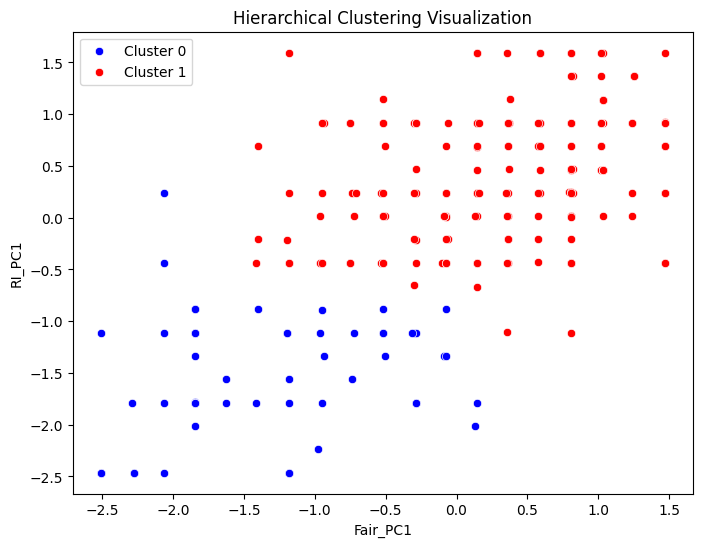

In [ ]:
# Scatter plot of the two clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fair_PC1', y='RI_PC1', data=hierarchical_cluster0, color='blue', label='Cluster 0')
sns.scatterplot(x='Fair_PC1', y='RI_PC1', data=hierarchical_cluster1, color='red', label='Cluster 1')

plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Fair_PC1')
plt.ylabel('RI_PC1')
plt.legend()

plt.show()

# Fairness, Revisit Intent, Word of Mouth, and Pricing Familiarity

Let's see if we can make sense out of the two clusters.

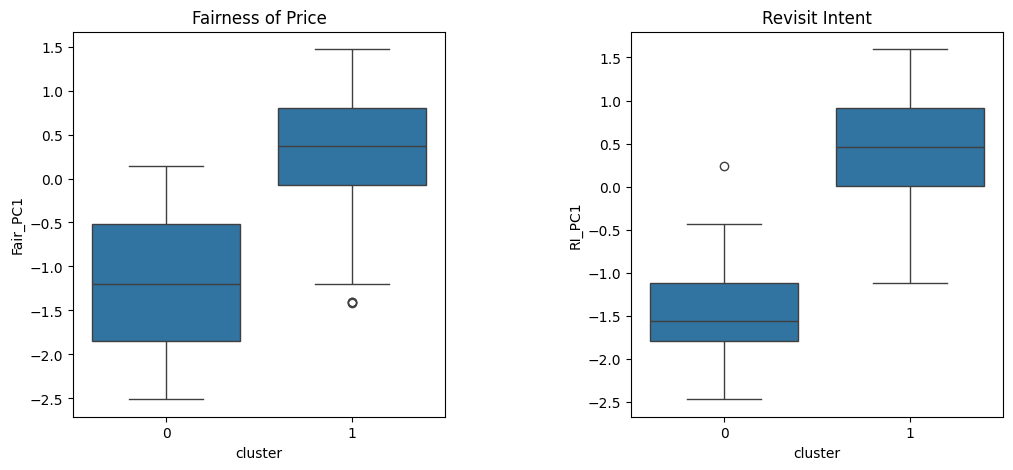

In [ ]:
initial_df_hierarchical = initial_df.copy()
initial_df_hierarchical['cluster'] = cluster_labels

initial_df_hierarchical_cluster_0 = initial_df_hierarchical[initial_df_hierarchical['cluster'] ==0]
initial_df_hierarchical_cluster_1 = initial_df_hierarchical[initial_df_hierarchical['cluster'] ==1]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fairness
sns.boxplot(x='cluster', y='Fair_PC1', data=df_pca, ax=axes[0])
axes[0].set_title('Fairness of Price')

# Revisit Intent
sns.boxplot(x='cluster', y='RI_PC1', data=df_pca, ax=axes[1])
axes[1].set_title('Revisit Intent')

#plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

It seems like customers that rate Fairness of Price higher also rate Revisit Intent higher and vice-versa.

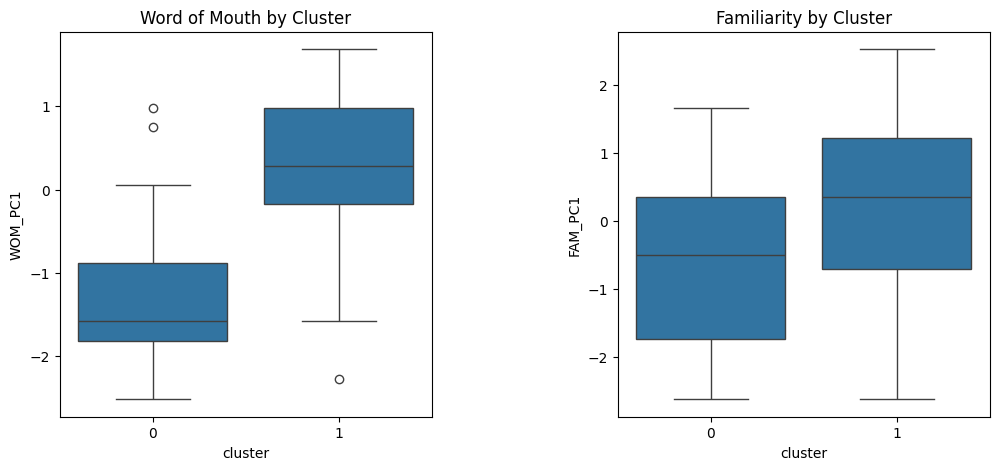

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Word Of Mouth
sns.boxplot(x='cluster', y='WOM_PC1', data=df_pca, ax=axes[0])
axes[0].set_title('Word of Mouth by Cluster')

# Familiarity
sns.boxplot(x='cluster', y='FAM_PC1', data=df_pca, ax=axes[1])
axes[1].set_title('Familiarity by Cluster')

#plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

Word of Mouth follows suit, but familiarity seems to overlap a lot more. Now, let's take a look at the other features, and see if we can identify some patterns.

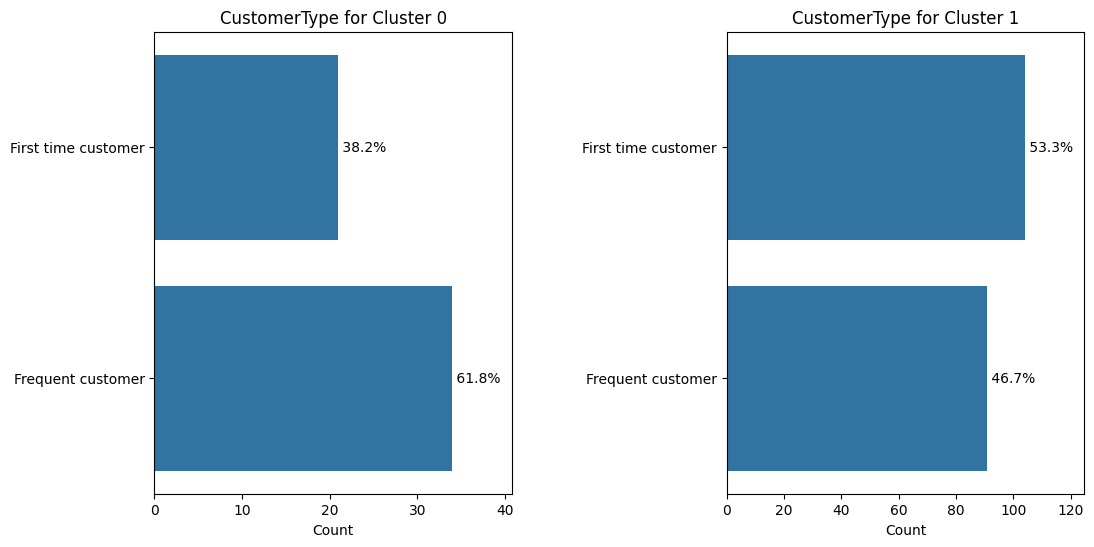

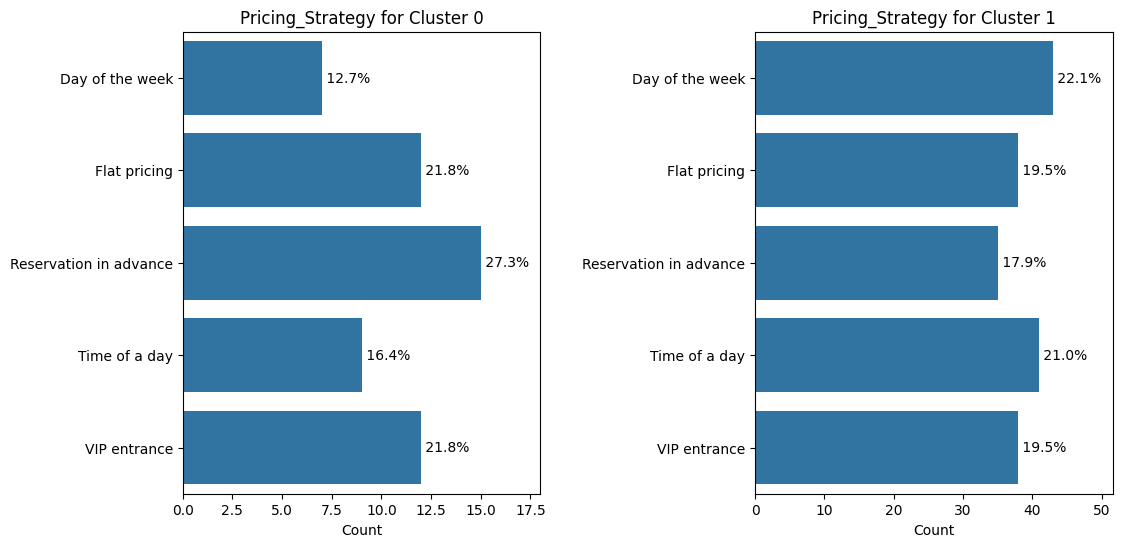

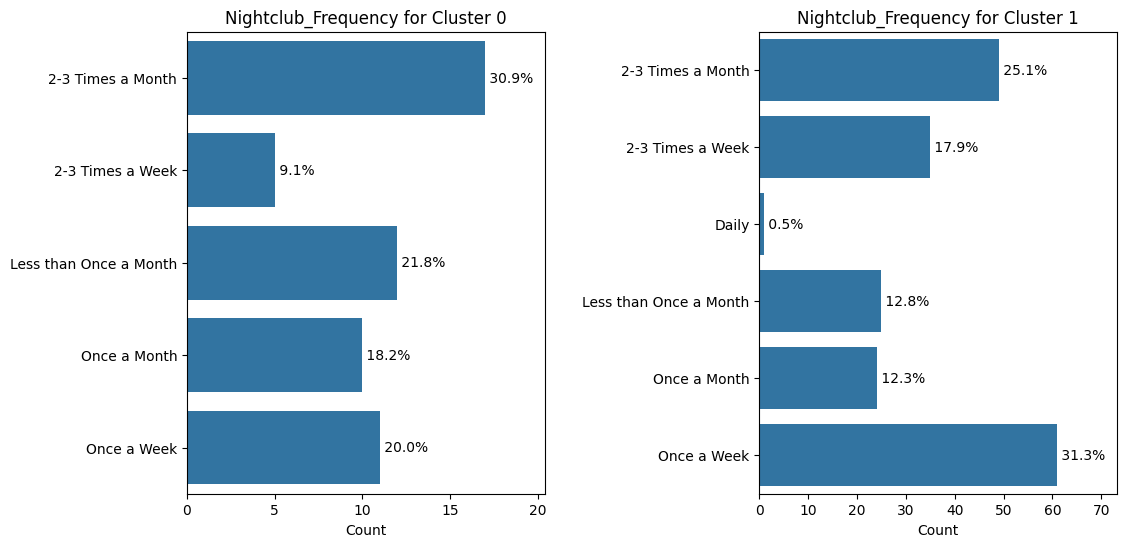

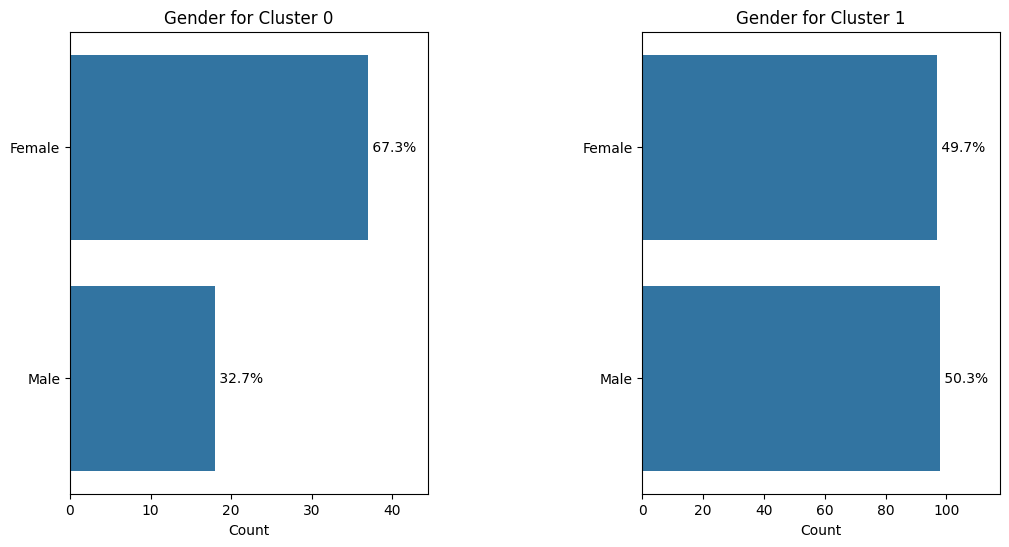

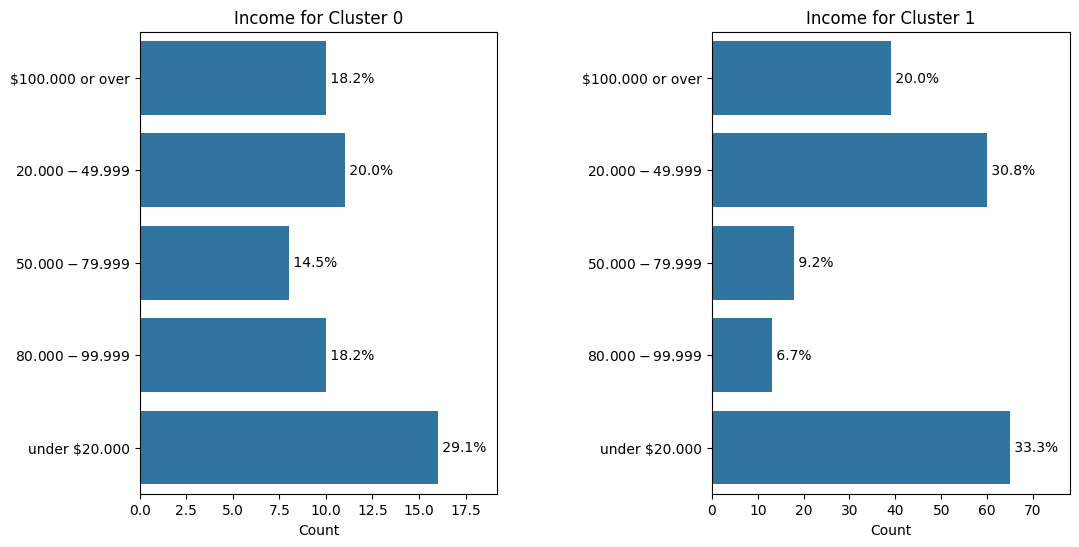

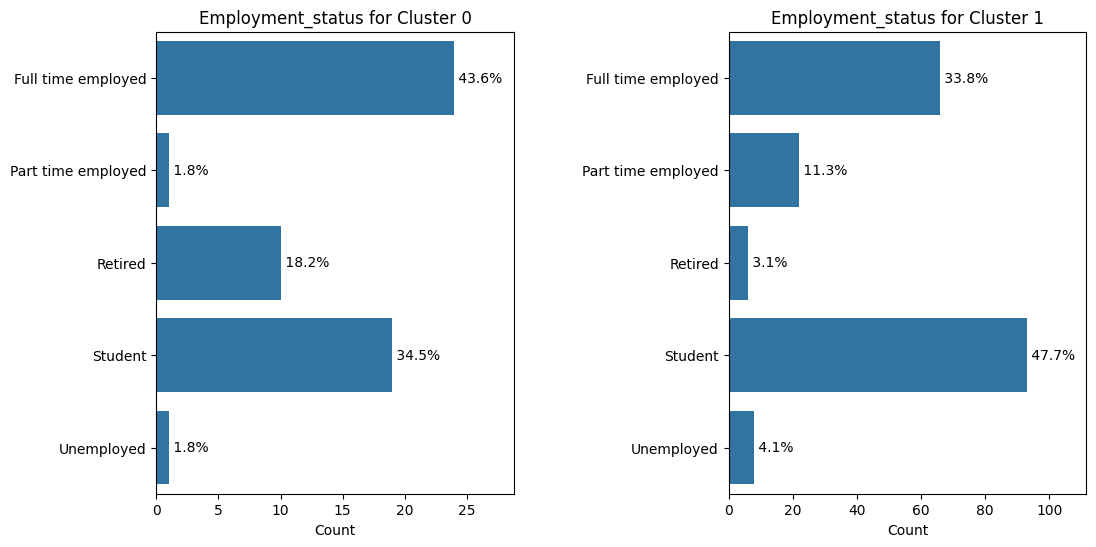

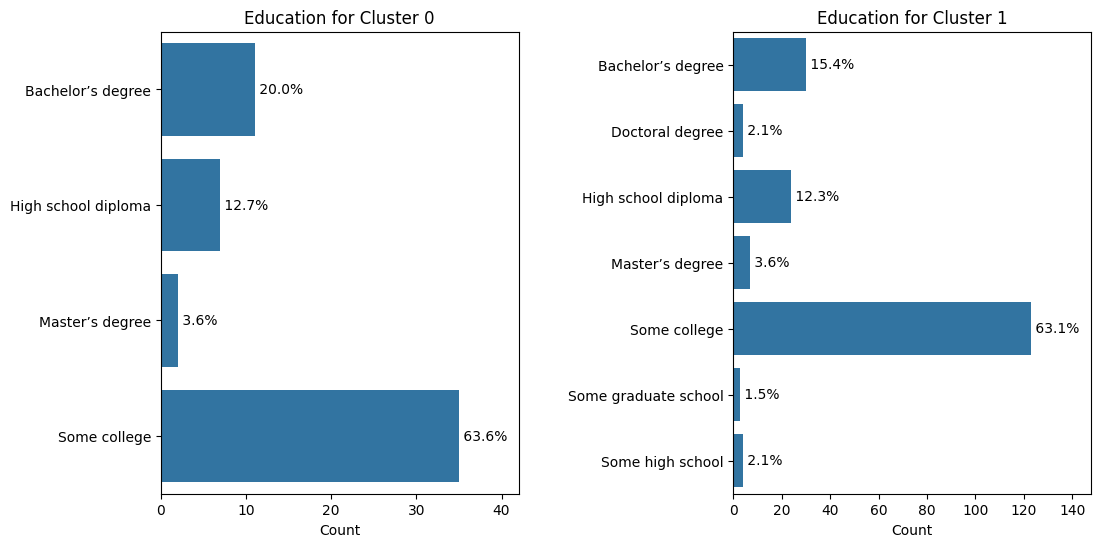

In [ ]:
for col in ["CustomerType", "Pricing_Strategy", "Nightclub_Frequency", "Gender", "Income", "Employment_status", "Education"]:

  fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns, side by side

  sns.countplot(data=initial_df_hierarchical_cluster_0, y=col, order=sorted(initial_df_hierarchical_cluster_0[col].unique()), ax=ax[0])
  total_0 = initial_df_hierarchical_cluster_0[col].count()
  for c in ax[0].containers:
    ax[0].bar_label(c, fmt='%0.1f%%', labels=[f' {(v / total_0) * 100:0.1f}%' for v in c.datavalues])
  ax[0].margins(x=0.2)
  ax[0].set(xlabel='Count', ylabel='', title=col + " for Cluster 0")

  sns.countplot(data=initial_df_hierarchical_cluster_1, y=col, order=sorted(initial_df_hierarchical_cluster_1[col].unique()), ax=ax[1])
  total_1 = initial_df_hierarchical_cluster_1[col].count()
  for c in ax[1].containers:
    ax[1].bar_label(c, fmt='%0.1f%%', labels=[f' {(v / total_1) * 100:0.1f}%' for v in c.datavalues])
  ax[1].margins(x=0.2)
  ax[1].set(xlabel='Count', ylabel='', title=col + " for Cluster 1")


  plt.subplots_adjust(wspace=0.6)
  plt.show()
  print()

In [ ]:
# compare age
print("Cluster 0 age stats: ")
print(hierarchical_cluster0['Age'].describe())
print()
print("Cluster 1 age stats: ")
print(hierarchical_cluster1['Age'].describe())

Cluster 0 age stats: 
count    55.000000
mean     37.393720
std      14.314171
min      21.000000
25%      22.500000
50%      35.000000
75%      51.500000
max      68.000000
Name: Age, dtype: float64

Cluster 1 age stats: 
count    195.000000
mean      31.317949
std       11.407695
min       21.000000
25%       22.000000
50%       26.000000
75%       39.000000
max       70.000000
Name: Age, dtype: float64


# Patterns

When it comes to Customer type,
- cluster 0 has moderately more regular customers
- oppositely, cluster 1 has slightly more new customers



When it comes to Pricing Strategy,
- there is a moderate indication that cluster 0 customers secure their entrance fee a bit more ahead of time.



When it comes to Night Club Frequency (how often a customer visits any nightclub),
- customers from cluster 0 seem to visit nightclubs a bit less in general than those of cluster 1



When it comes to gender,
- customers of cluster 0 seem to be 2/3 female
- customers of cluster 1 seem equally distrubuted between male and female



When it comes to income,
- customers from cluster 0 seem to have a moderately higher proportion of the middle class (have income in between 50,000 and 99,999).



When it comes to employment,
- customers from cluster 0 seem to have more fully imployed or retired people
- customers from cluster 1 seem to be more part time employed and studying



When it comes to education,
- customers from both clusters 0 and 1 seem to have an almost identical education level



When it comes to age,
- customers from cluster 0 seem to be slightly older than customers from cluster 1.

# The Summary and Suggestions for the manager are included in report.pdf